<a href="https://colab.research.google.com/github/mtthoriq/mtthoriq/blob/main/EDA-Platinum%20Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Assessment

In [ ]:
from google.colab import files
files.upload()

Saving train_preprocess.tsv.txt to train_preprocess.tsv.txt


{'train_preprocess.tsv.txt': b'warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !\tpositive\nmohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah\tneutral\nlokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .\tpositive\nbetapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !\tpositive\nduh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sud

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
challenge_df = pd.read_csv("train_preprocess.tsv", names=["text","label"], sep="\t", encoding="utf-8")

In [ ]:
challenge_df.head(5)

text     label
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative

In [ ]:
challenge_df.describe()

text     label
count   11000     11000
unique  10933         3
top     kesal  positive
freq        4      6416

In [ ]:
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
 1   label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [ ]:
sum(challenge_df.duplicated())

67

In [ ]:
challenge_df.shape

(11000, 2)

In [ ]:
challenge_df = challenge_df.drop_duplicates()

In [ ]:
sum(challenge_df.duplicated())

0

In [ ]:
challenge_df.isna().sum()

text     0
label    0
dtype: int64

## Data Cleaning

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.6 MB/s 


In [ ]:
from unidecode import unidecode
import re

In [ ]:
def cleanText(text):
    text = re.sub(r'\\x[A-Za-z0-9./]+',' ', unidecode(text))
    text = re.sub(r'\\x.{2}',' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\\n.{0}', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub('\!','',text)
    return text

challenge_df['cleaned_text'] = challenge_df['text'].apply(cleanText)

In [ ]:
challenge_df.sample(5)

text     label  \
4184  respons lambat pengiriman tidak sesuai permintaan  negative   
9550  bangsa mau dibawa ke mana . kapok . mana polis...  negative   
5514  ayam penyet nya enak , porsi bisa lebih banyak...  positive   
2031  tempat makan yang wajib di ku njungi oleh para...  positive   
9350  menurut saya tempat nya kecil dan juga buat ya...  positive   

                                           cleaned_text  \
4184  respons lambat pengiriman tidak sesuai permintaan   
9550  bangsa mau dibawa ke mana   kapok   mana polis...   
5514  ayam penyet nya enak   porsi bisa lebih banyak...   
2031  tempat makan yang wajib di ku njungi oleh para...   
9350  menurut saya tempat nya kecil dan juga buat ya...   

                                               new_text  
4184        respons lambat pengiriman sesuai permintaan  
9550  bangsa dibawa . kapok . polisi polisi . sadar-...  
5514  ayam penyet enak , porsi . memesan 1 ayam peny...  
2031  makan wajib ku njungi kaula muda . __laugh__ m...  
9350  outdoor rentan kehujanan makan lumayan enak ha...

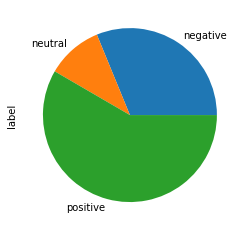

In [ ]:
challenge_df.groupby('label').label.count().plot(kind='pie')

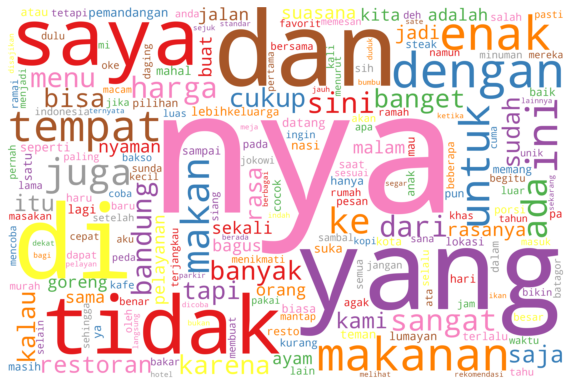

In [ ]:
# untuk mendapatkan visualisasi kata mana yang paling sering muncul

from wordcloud import WordCloud

text = ' '.join(challenge_df['text']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "white", random_state=1, colormap='Set1', collocations=False).generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Data Preprocessing

In [ ]:
from google.colab import files

files.upload()

Saving stopwordbahasa.csv to stopwordbahasa.csv


{'stopwordbahasa.csv': b'ada\nadalah\nadanya\nadapun\nagak\nagaknya\nagar\nakan\nakankah\nakhir\nakhiri\nakhirnya\naku\nakulah\namat\namatlah\nanda\nandalah\nantar\nantara\nantaranya\napa\napaan\napabila\napakah\napalagi\napatah\nartinya\nasal\nasalkan\natas\natau\nataukah\nataupun\nawal\nawalnya\nbagai\nbagaikan\nbagaimana\nbagaimanakah\nbagaimanapun\nbagi\nbagian\nbahkan\nbahwa\nbahwasanya\nbaik\nbakal\nbakalan\nbalik\nbanyak\nbapak\nbaru\nbawah\nbeberapa\nbegini\nbeginian\nbeginikah\nbeginilah\nbegitu\nbegitukah\nbegitulah\nbegitupun\nbekerja\nbelakang\nbelakangan\nbelum\nbelumlah\nbenar\nbenarkah\nbenarlah\nberada\nberakhir\nberakhirlah\nberakhirnya\nberapa\nberapakah\nberapalah\nberapapun\nberarti\nberawal\nberbagai\nberdatangan\nberi\nberikan\nberikut\nberikutnya\nberjumlah\nberkali-kali\nberkata\nberkehendak\nberkeinginan\nberkenaan\nberlainan\nberlalu\nberlangsung\nberlebihan\nbermacam\nbermacam-macam\nbermaksud\nbermula\nbersama\nbersama-sama\nbersiap\nbersiap-siap\nbertanya\n

In [ ]:
stopwords_df = pd.read_csv("stopwordbahasa.csv",names=['kata'])
stopwords_df.head(5)

kata
0     ada
1  adalah
2  adanya
3  adapun
4    agak

In [ ]:
list_stopwords = stopwords_df['kata'].to_list()
list_stopwords.append("nya")

def remove_stopwords(s):
  s = s.split(" ") # merubah string menjadi list
  s = [x for x in s if x not in list_stopwords] # menghapus kata pada s, jika kata tersebut ada pada list_stopwords
  s = ' '.join(s) # menggabung list menjadi string, dipisah oleh spasi
  return s

challenge_df['new_text'] = challenge_df.cleaned_text.apply(remove_stopwords) # apply function remove_stopwords untuk bikin kolom baru
challenge_df.head(5)

text     label  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2  lokasi strategis di jalan sumatera bandung . t...  positive   
3  betapa bahagia nya diri ini saat unboxing pake...  positive   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative   

                                        cleaned_text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   
2  lokasi strategis di jalan sumatera bandung   t...   
3  betapa bahagia nya diri ini saat unboxing pake...   
4  duh   jadi mahasiswa jangan sombong dong   kas...   

                                            new_text  
0  warung dimiliki pengusaha pabrik puluhan terke...  
1  mohon ulama lurus k212 mmbri hujjah partai diw...  
2  lokasi strategis jalan sumatera bandung   nyam...  
3  betapa bahagia unboxing paket barang bagus   m...  
4  duh   mahasiswa sombong   kasih kartu kuning  ...

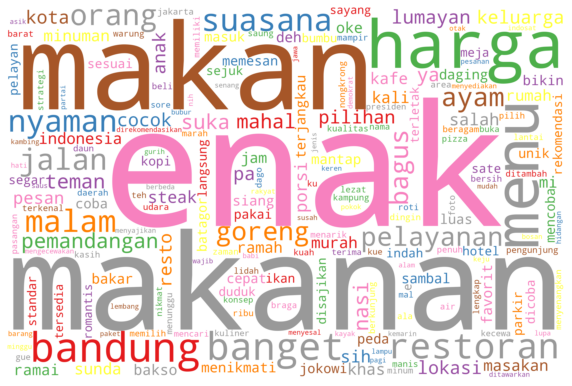

In [ ]:
text = ' '.join(challenge_df['new_text']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "white", random_state=1, colormap='Set1', collocations=False).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

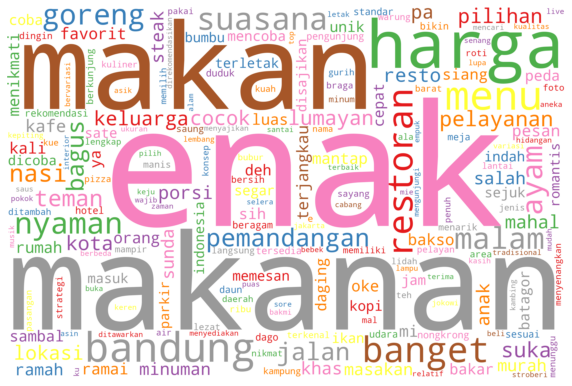

In [ ]:
df_positif = challenge_df[challenge_df['label'] == 'positive']

text = ' '.join(df_positif['new_text']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "white", random_state=1, colormap='Set1', collocations=False).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

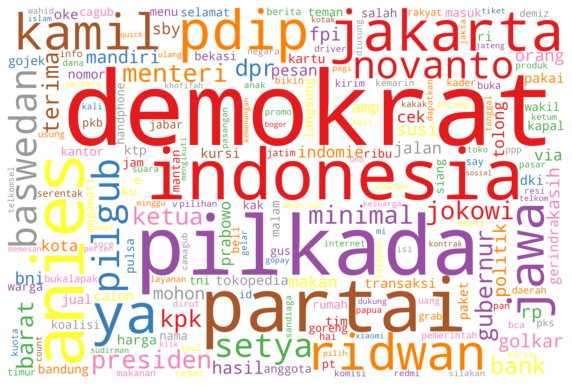

In [ ]:
df_neutral = challenge_df[challenge_df['label'] == 'neutral']

text = ' '.join(df_neutral['new_text']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "white", random_state=1, colormap='Set1', collocations=False).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

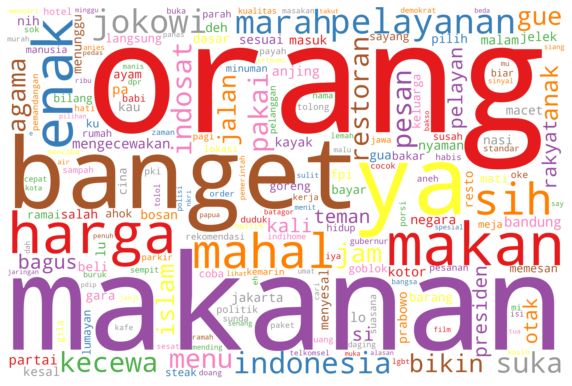

In [ ]:
df_negative = challenge_df[challenge_df['label'] == 'negative']

text = ' '.join(df_negative['new_text']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "white", random_state=1, colormap='Set1', collocations=False).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
challenge_df['label'].value_counts()

positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64

In [ ]:
challenge_df.to_csv("sentiment_analysis.csv", 
          sep = ",")

In [ ]:
df = challenge_df.filter(['new_text', 'label'])
df.head(5)

new_text     label
0  warung dimiliki pengusaha pabrik puluhan terke...  positive
1  mohon ulama lurus k212 mmbri hujjah partai diw...   neutral
2  lokasi strategis jalan sumatera bandung   nyam...  positive
3  betapa bahagia unboxing paket barang bagus   m...  positive
4  duh   mahasiswa sombong   kasih kartu kuning  ...  negative

In [ ]:
challenge_df.head(5)

text     label  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2  lokasi strategis di jalan sumatera bandung . t...  positive   
3  betapa bahagia nya diri ini saat unboxing pake...  positive   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative   

                                        cleaned_text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   
2  lokasi strategis di jalan sumatera bandung   t...   
3  betapa bahagia nya diri ini saat unboxing pake...   
4  duh   jadi mahasiswa jangan sombong dong   kas...   

                                            new_text  
0  warung dimiliki pengusaha pabrik puluhan terke...  
1  mohon ulama lurus k212 mmbri hujjah partai diw...  
2  lokasi strategis jalan sumatera bandung   nyam...  
3  betapa bahagia unboxing paket barang bagus   m...  
4  duh   mahasiswa sombong   kasih kartu kuning  ...

In [ ]:
def cleanText(text):
    text = re.sub('\,','',text) # Removing the , symbols
    return text

challenge_df['new_text'] = challenge_df['new_text'].apply(cleanText)

In [ ]:
challenge_df.head(5)

text     label  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral   
2  lokasi strategis di jalan sumatera bandung . t...  positive   
3  betapa bahagia nya diri ini saat unboxing pake...  positive   
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative   

                                        cleaned_text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu...   
1  mohon ulama lurus dan k212 mmbri hujjah partai...   
2  lokasi strategis di jalan sumatera bandung   t...   
3  betapa bahagia nya diri ini saat unboxing pake...   
4  duh   jadi mahasiswa jangan sombong dong   kas...   

                                            new_text  
0  warung dimiliki pengusaha pabrik puluhan terke...  
1  mohon ulama lurus k212 mmbri hujjah partai diw...  
2  lokasi strategis jalan sumatera bandung   nyam...  
3  betapa bahagia unboxing paket barang bagus   m...  
4  duh   mahasiswa sombong   kasih kartu kuning  ...

In [ ]:
df.to_csv("sentiment_analysis.csv", 
          sep = ",")

In [ ]:
from google.colab import files
files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


{'sentiment_analysis.csv': b',text,label\r\n0,warung dimiliki pengusaha pabrik puluhan terkenal putih bandung   berkualitas   dipadu keahlian memasak   dipadu kretivitas   warung menyajikan menu utama berbahan   ditambah menu ayam   selera indonesia   harga terjangkau   lewatkan bletoka   kalah asli tegal  ,positive\r\n1,mohon ulama lurus k212 mmbri hujjah partai diwlh suara islam pecah pecah,neutral\r\n2,lokasi strategis jalan sumatera bandung   nyaman sofa lantai 2   paella enak   pas dimakan minum bir dingin   appetiser enak enak  ,positive\r\n3,betapa bahagia unboxing paket barang bagus   menetapkan beli  ,positive\r\n4,duh   mahasiswa sombong   kasih kartu kuning   belajar   usahlah politik   selesai kuliah politik telat   dasar mahasiswa  ,negative\r\n5,makanan beragam   harga makanan food stall 10   kasir   suasana ramai perhatian parkir duduk  ,positive\r\n6,pakai kartu kredit bca untung rugi,negative\r\n7,unik   bagus foto   makanan enak   pegawai ramah   bersih luas   wifi ke

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("sentiment_analysis.csv", encoding="utf-8")

In [ ]:
df.head(5)

Unnamed: 0                                               text     label
0           0  warung dimiliki pengusaha pabrik puluhan terke...  positive
1           1  mohon ulama lurus k212 mmbri hujjah partai diw...   neutral
2           2  lokasi strategis jalan sumatera bandung   nyam...  positive
3           3  betapa bahagia unboxing paket barang bagus   m...  positive
4           4  duh   mahasiswa sombong   kasih kartu kuning  ...  negative

In [ ]:
df['label'].value_counts()

positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head(5)

text     label
0  warung dimiliki pengusaha pabrik puluhan terke...  positive
1  mohon ulama lurus k212 mmbri hujjah partai diw...   neutral
2  lokasi strategis jalan sumatera bandung   nyam...  positive
3  betapa bahagia unboxing paket barang bagus   m...  positive
4  duh   mahasiswa sombong   kasih kartu kuning  ...  negative

In [ ]:
df_positif = df[df['label'] == 'positive']
df_positif.head(5)

text     label
0  warung dimiliki pengusaha pabrik puluhan terke...  positive
2  lokasi strategis jalan sumatera bandung   nyam...  positive
3  betapa bahagia unboxing paket barang bagus   m...  positive
5  makanan beragam   harga makanan food stall 10 ...  positive
7  unik   bagus foto   makanan enak   pegawai ram...  positive

In [ ]:
df_positif.to_csv("df_positif.csv", 
          sep = ",")

In [ ]:
df_neutral = df[df['label'] == 'neutral']
df_neutral.head(5)

text    label
1   mohon ulama lurus k212 mmbri hujjah partai diw...  neutral
16                     bumn dibentuk uu dibentuk uu    neutral
28             pdip ridwan kamil menang berbaju merah  neutral
32  08 30   kedatangan presiden ri rombongan gate ...  neutral
37  risma menjatuhkan pilihan gus ipul   puti pilg...  neutral

In [ ]:
df_neutral.to_csv("df_neutral.csv", 
          sep = ",")

In [ ]:
df_negative = df[df['label'] == 'negative']
df_negative.head(5)

text     label
4   duh   mahasiswa sombong   kasih kartu kuning  ...  negative
6                  pakai kartu kredit bca untung rugi  negative
10  simcard indosat inaktiv gara gara lupa isi pul...  negative
11          sifat iri muncul orang orang tujuan hidup  negative
13  pengalaman indosat   semoga pelanggan   marah ...  negative

In [ ]:
df_negative.to_csv("df_negative.csv", 
          sep = ",")